<a href="https://colab.research.google.com/github/Esperqn/MicroProyect/blob/main/BosquesAleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bosques Aleatorios

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Cargar datos
datos= pd.read_excel('Glucosa_Data_Base_Clean.xlsx', engine='openpyxl')
X= datos.drop(columns=['Glucosa'])
y=datos['Glucosa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo_rf= RandomForestRegressor (
    n_estimators=300,
    max_depth=18,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    oob_score=True,
    n_jobs=-1,
    verbose=1
)

modelo_rf.fit(X_train, y_train)

y_predT= modelo_rf.predict(X_train)
print("MAE:", mean_absolute_error(y_train, y_predT))
print("RMSE:", mean_squared_error(y_train, y_predT))

y_pred= modelo_rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


MAE: 2.6216690515765184
RMSE: 13.691723645200248
MAE: 6.346854915644472
RMSE: 70.34133459581099


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


In [ ]:
X_test[:5]

array([[9.70000000e+01, 6.50000000e+01, 1.60000000e+01, 3.80000000e+01,
        3.30000000e+00, 3.63000000e+01, 3.66000000e+01, 2.58133333e-01,
        1.84000000e-02, 1.57409920e-01, 2.41937015e-01, 4.01972274e-01,
        1.93759347e-01, 1.49126670e-01, 2.41792593e-01, 3.98742799e-01,
        1.92177778e-01, 5.04037460e-02, 8.60062000e-03, 5.23259060e-02,
        2.54222590e-02],
       [9.80000000e+01, 6.10000000e+01, 1.70000000e+01, 3.10000000e+01,
        3.80000000e+00, 3.63000000e+01, 3.66000000e+01, 3.54133333e-01,
        0.00000000e+00, 1.97400749e-01, 3.15041644e-01, 3.90926897e-01,
        2.69845702e-01, 1.85255760e-01, 3.14337255e-01, 3.89522873e-01,
        2.66619608e-01, 6.81905810e-02, 2.17033600e-02, 3.41211950e-02,
        4.28818780e-02],
       [9.40000000e+01, 6.90000000e+01, 1.60000000e+01, 2.10000000e+01,
        7.10000000e+00, 3.54000000e+01, 3.66000000e+01, 1.86400000e+00,
        0.00000000e+00, 1.33153943e+00, 1.75830173e+00, 6.32970799e-01,
        1.4945

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,250, 300],
    'max_depth': [8,13,18],
    'min_samples_split': [1, 2, 3]
}

grid_search = GridSearchCV(
    modelo_rf,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
  )
grid_search.fit(X_train, y_train)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ", -grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Mejores parámetros:  {'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación de validación cruzada:  106.84910858157632


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBacken

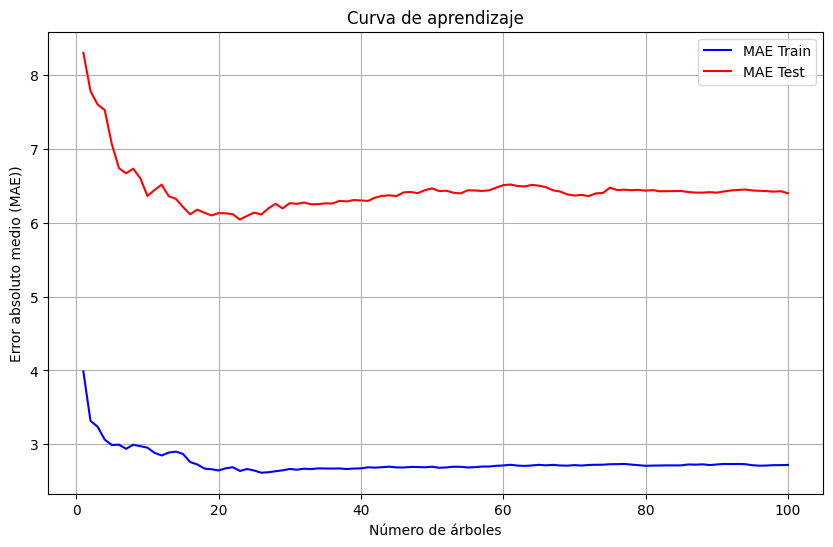


MAE Entrenamiento: 2.719575356463597
MAE Evaluación: 6.400853741496599
RMSE: 15.467796954079349


In [11]:
mae_train = []
mae_test=[]
max_arboles=100

for i in range(1,max_arboles+1):
    modelo_rf.set_params(n_estimators=i)
    modelo_rf.fit(X_train, y_train)


    y_pred_train= modelo_rf.predict(X_train)
    y_pred_test= modelo_rf.predict(X_test)


    mae_train.append(mean_absolute_error(y_train, y_pred_train))
    mae_test.append(mean_absolute_error(y_test, y_pred_test))


plt.figure(figsize=(10,6))
plt.plot(range(1, max_arboles+1), mae_train, label='MAE Train', color='blue')
plt.plot(range(1, max_arboles+1), mae_test, label='MAE Test', color= 'red')
plt.xlabel('Número de árboles')
plt.ylabel('Error absoluto medio (MAE))')
plt.grid(True)
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

print("")
print("MAE Entrenamiento:", mean_absolute_error(y_train, y_pred_train))
print("MAE Evaluación:", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", mean_squared_error(y_train, y_pred_train))



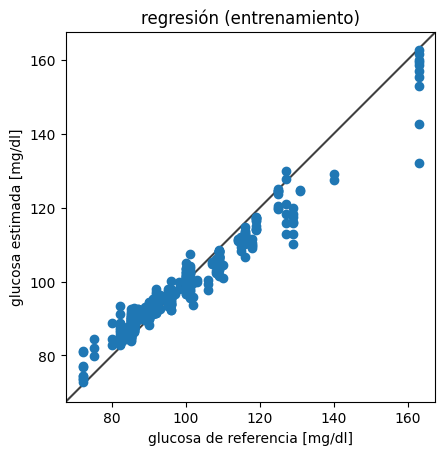

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_predT)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# Etiquetas de los ejes

ax.set_xlabel('glucosa de referencia [mg/dl]')
ax.set_ylabel('glucosa estimada [mg/dl]')

# Mostrar la gráfica
plt.title("regresión (entrenamiento)")
plt.show()

In [ ]:
importancias= modelo_rf.feature_importances_
nombres_features = datos.iloc[:,2:].columns
for feature, importancia in zip(nombres_features, importancias):
    print(f"{feature}: {importancia}")


Spo2: 0.019174530893976485
Fc masimo: 0.06631370604775777
Fr: 0.01987660274384261
Vpi: 0.07984337068036275
Pi: 0.047822659712458256
Temp manos: 0.06810033413908335
Temp corp: 0.03340750083385614
Máximo: 0.04067419507134987
Minimo: 0.010341253728766304
RMS señal: 0.04129570306541689
RMS_V pico: 0.04790016715803984
RMS_V w: 0.10224841089014129
RMS_Vpp: 0.03612904999438167
Promedio Señal: 0.034260351514098834
Promedio pico: 0.048258956271899515
Promedio ancho: 0.10337396800679859
Promedio prominencia: 0.04871397775865627
STD_Senal: 0.054587977136863725
STD_V pico: 0.030603510349146424
STD_Vpp: 0.04077814691000986
STD_Vw: 0.026295627093093635


In [ ]:
primer_arbol = modelo_rf.estimators_[0]
primer_arbol

DecisionTreeRegressor(max_depth=10, max_features='sqrt',
                      random_state=1608637542)

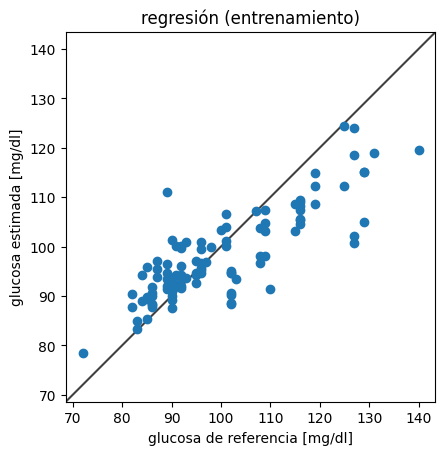

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# Etiquetas de los ejes

ax.set_xlabel('glucosa de referencia [mg/dl]')
ax.set_ylabel('glucosa estimada [mg/dl]')

# Mostrar la gráfica
plt.title("regresión (entrenamiento)")
plt.show()

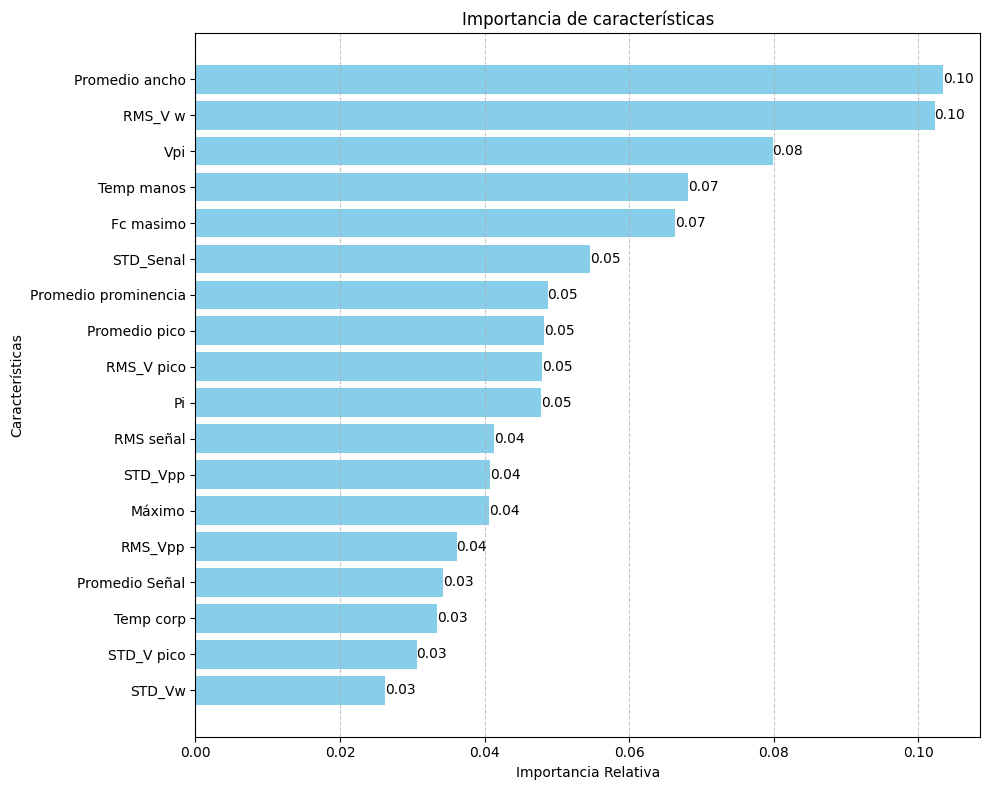

In [ ]:
importancias= modelo_rf.feature_importances_
nombres_features = datos.iloc[:,2:].columns
indices_importantes = np.where(importancias > 0.02)[0]
importancias_filtradas = importancias[indices_importantes]
nombres_features_filtrados = np.array(nombres_features)[indices_importantes]

indices_ordenados = np.argsort(importancias_filtradas)[::-1]
importancias_filtradas_ordenado = importancias_filtradas[indices_ordenados]
nombres_ordenados = nombres_features_filtrados[indices_ordenados]

#Gráfico
plt.figure(figsize=(10, 8))
bars= plt.barh(nombres_ordenados, importancias_filtradas_ordenado, align='center', color='skyblue')
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.title('Importancia de características')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(importancias_filtradas_ordenado):
    plt.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error

def print_metrics(y_true, y_pred, set_name):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)
  r_value, _ = pearsonr(y_true, y_pred)
  print(f"{set_name}:")
  print(f"  MAE: {mae:.4f}")
  print(f"  MSE: {mse:.4f}")
  print(f"  R2: {R2:.4f}")
  print(f"  R: {r_value:.4f}")

print_metrics(y_train, y_predT, "Train")
print_metrics(y_test, y_pred, "Test")


Train:
  MAE: 2.6217
  MSE: 13.6917
  R2: 0.9520
  R: 0.9859
Test:
  MAE: 6.3469
  MSE: 70.3413
  R2: 0.6501
  R: 0.8391
